To follow the notebooks fow, it is best to follow them from notebook 1 (this one, data visualisation) and go sequentialy in the increasing number of the notebooks name. 

The aim of this project is to build and identify the best model to fit the tarets of Elongation, Roughnesss and tensile strength. 
* A regression and decision tree models will be implemented with and without the libraries for each of the targets, for comparisons and identification of the best model for each targets
* Neural Network model with the librry will also be explored for the further investigatin 


In [59]:
import numpy as np #Importing the librries needed 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv("data_3dprinter.csv")#Importing data


In [2]:
df.head(2)


layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4

Loading the dataset that will be cleaned and visualised here 

In [3]:
df.dtypes #loading data typs of the dataset 

layer_height          float64
wall_thickness          int64
infill_density          int64
infill_pattern         object
nozzle_temperature      int64
bed_temperature         int64
print_speed             int64
material               object
fan_speed               int64
roughness               int64
tension_strenght        int64
elongation            float64
dtype: object

Checking the data types included in the dataset

In [4]:
df.info(1) #Getting the dataset info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [5]:
df.isnull().sum() #Checking if there are any missing values in the dataset

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

Checking if there are any missing values in the dataset, There is none missing, so prceeding further.

In [61]:
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True)#Replacing the typo
df.head(2)


layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   

   roughness  tensile_strength  elongation  
0         25                18         1.2  
1         32                16         1.4

A typo was detected and then corrected to clean the dataset 

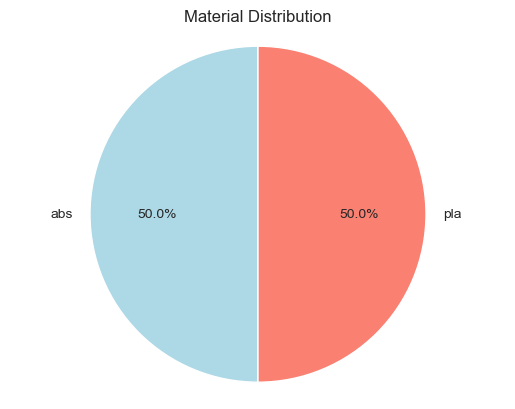

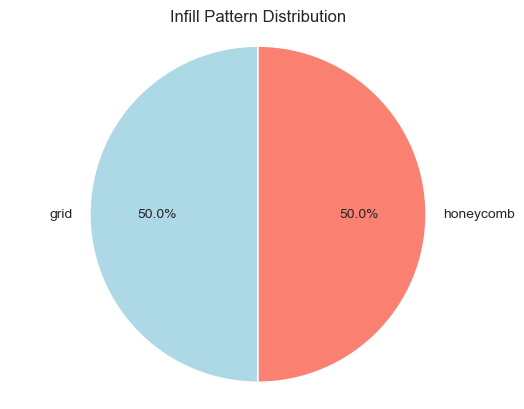

In [63]:
df['material'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Material Distribution') #plotting the categorical dataset 
plt.ylabel('') 
plt.axis('equal')  
plt.show()

df['infill_pattern'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Infill Pattern Distribution')
plt.ylabel('')
plt.axis('equal')
plt.show()



Plotting the categorical values in pie charts to see the distribution. 
The 'Material Distribution' pie chart shows a 50/50 split (equal representation of both materials) between 'abs' and 'pla' materials. There is no material bias in this dataset, which will make comparisons more reliable. Since, there is equal representation of the 2 materials, any observed differences in other properties can be attributed to material characteristics (rather than sample size imbalance). 
The 'Infill Pattern Distribution' also has an equal distribution between 'Grid' and 'Honeycomb'. This ensures fair comparison between the infill pattern types without bias from sample size differences. 
When building a regression model, 'Material type' and 'Infill Pattern' would be an effective categorical feature for prediction.  

In [65]:
if 'infill_pattern' in df.columns:
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})#Encoding the categorical data 

if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True)#Drop non-encoded, categorical string columns
df.head(2)


layer_height  wall_thickness  infill_density  nozzle_temperature  \
0          0.02               8              90                 220   
1          0.02               7              90                 225   

   bed_temperature  print_speed  fan_speed  roughness  tensile_strength  \
0               60           40          0         25                18   
1               65           40         25         32                16   

   elongation  infill_pattern_encoded  material_encoded  
0         1.2                       0                 0  
1         1.4                       1                 0

Encoding the dataset so there is only numerical values in the dataset, ready to be analysed. Data is Cleaned and Encoded now 

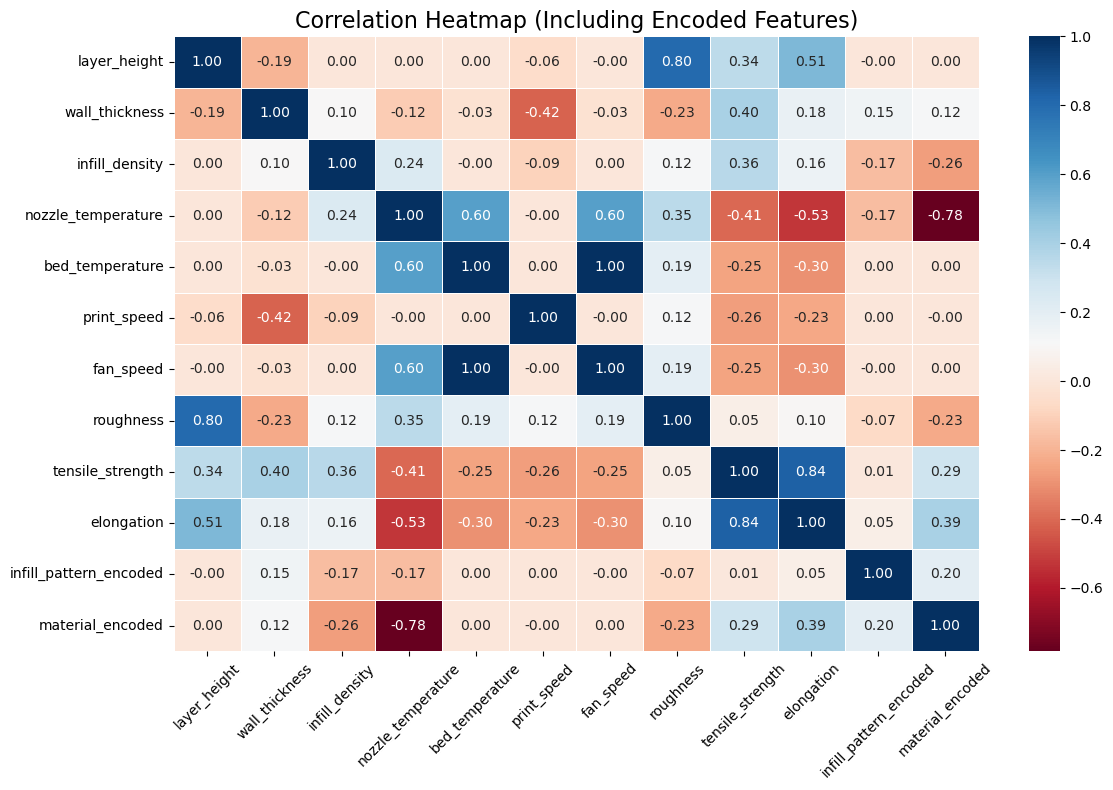

In [9]:
corr_matrix = df.corr(numeric_only=True)#Creating the matrix of correlation between all the features and labels
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu", linewidths=0.5)#plotting the heatmap 
plt.title("Correlation Heatmap (Including Encoded Features)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlation heatmap is plotted for all the features and targets of the dataset

There is an example of perfect positive correlation and this happens between 'Fan Speed' and 'Bed Temperature'; they have a correlation of exactly 1, suggesting strong positive correlation. If we were to plot these 2 variables on a scatter diagram, all of the data would lie exactly on a straight line that slopes upwards.This means that a change in one of these variables is directly proportional to a change in the other variable. However, both of the variables, 'fan speed' and 'bed temperature' are both features, inputs, this implies that they should not be plotted once against the other. As for regression models it is needed to plot an input vs output, as it is supervised learning model. 

There are a couple examples of strong positive correlation (0.8+) in the heatmap above. 
* 'Elongation' and 'Tensile strength' have a strong positive correlation of 0.84. This is to be predicted, as strong materials tend to have a higher elongation before breaking. Both 'Elongation' and 'Tensile Strength' are labels, outputs, so that they should not be plotted against one another, for supervised learning, regression models. 
* 'Roughness' and 'Layer Height' have a strong positive correlation of 0.8. This means that as layer height increases the roughness also increases. 'Roughness' is a label and 'Layer Height' is a feature, suggesting that linear regression model can be used, and 'Nozzle Temperature' also has a correlation of 0.35, suggesting that if linear regression is underfitting the polynomial regression with 'Nozzle Temperature' can be explored.  

There are also a couple examples of moderate positive correlation (0.5-0.8) in the heatmap.
* 'Fan speed' and 'Nozzle temperature' have a moderate positive correlation of 0.6. This could be due to heat dissipation.
*'Elongation' and 'Layer height' have a moderate positive correlation of 0.51. This would be because thicker layers allow for more material bonding which could make them more flexible before breaking. Thinner layers tend to be more fragile leading to a lower elongation.Both of the variables are labels and can nout be used in the suipervised regression model. 

Examples of weaker positive correlation (0-0.5) in the heatmap.
* 'Tensile strength' and 'Wall thickness' have a weaker positive correlation of 0.4. This is due to thicker walls leading to stronger prints in most cases. 
* 'Roughness' and 'Nozzle temperature' have a weaker positive correlation of 0.35. This could be because overheating can lead to over-extrusion, which would damage the outer dimensions of the object leading to roughness. Variables are a Label and a Feature, implying that a regression model can be applied. From the above 'Roughness' already has strong linear correlation with 'Layer Height', this implies that polynomial regression can be potentially implemented. 

Examples of no correlation (r=0):
* 'print speed' and 'bed temperature'
* 'nozzle temperature' and 'layer height'
For the above, there is no linear relationship between the 2 variables.

Weaker negative correlation (-0.5-0):
* 'Nozzle temperature' and 'wall thickness'
* 'print speed' and 'wall thickness'

Moderate negative correlation (-0.8 - -0.5):
* 'elongation' and 'nozzle temperature' As one is a label and the other is a feature, a regression model can be potentially implemented
* 'material_encoded' and 'nozzle temperature'

Strong negative correlation (-0.8 - -1):
* 'material_encoded' and 'nozzle temperature' (r=-0.78)

The provided dataset is relatively small (not best suited for neural network models), with multiple linear correlations, suggesting that data is well suited for the supervised learning such as Regression and Decision Trees. 
Overall, 'Tensile Strength' and 'Elongation' do not show strong correlation (linear or polynomial) or clear linearity properties, hence the decision trees should be a better suited models, however both regression and tree models would be explored for all the targets. 

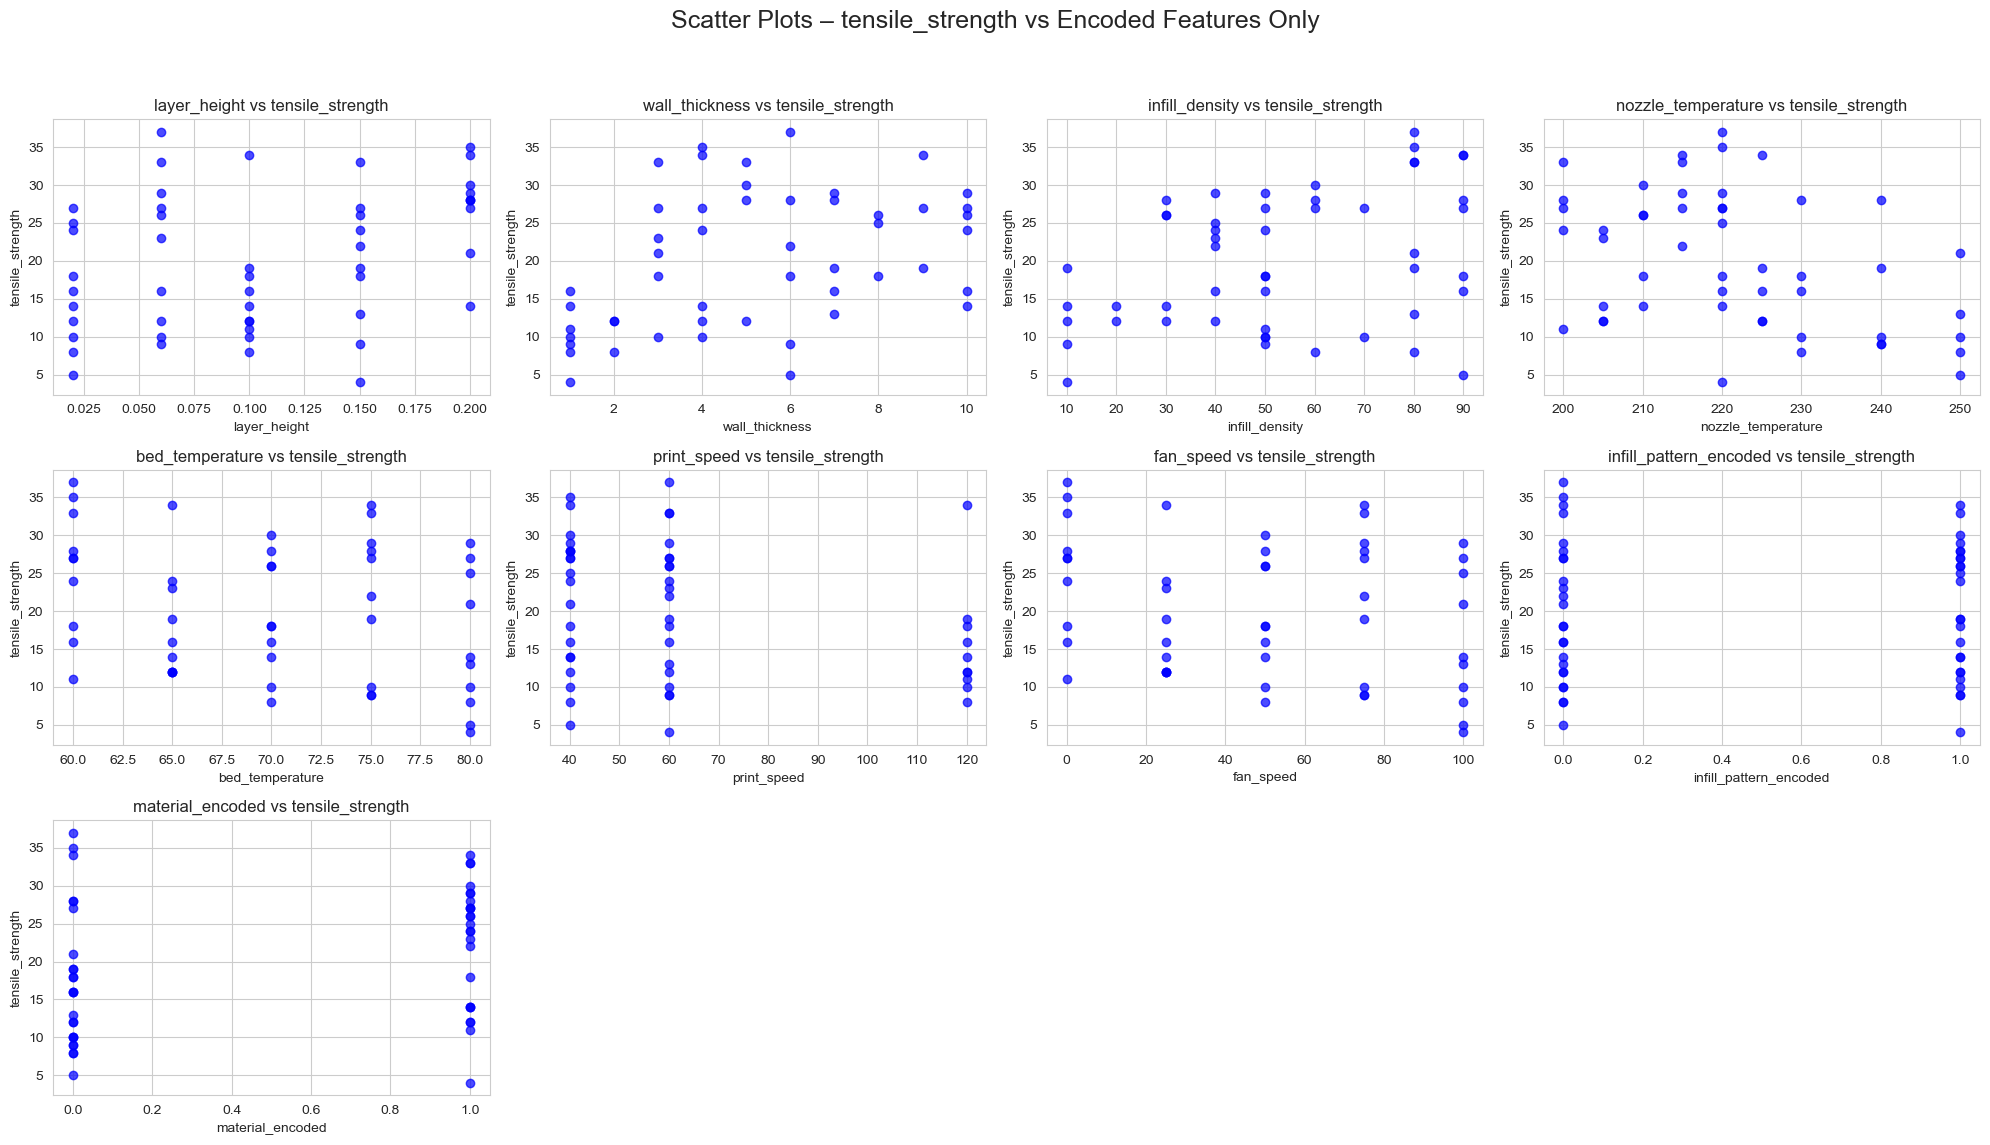

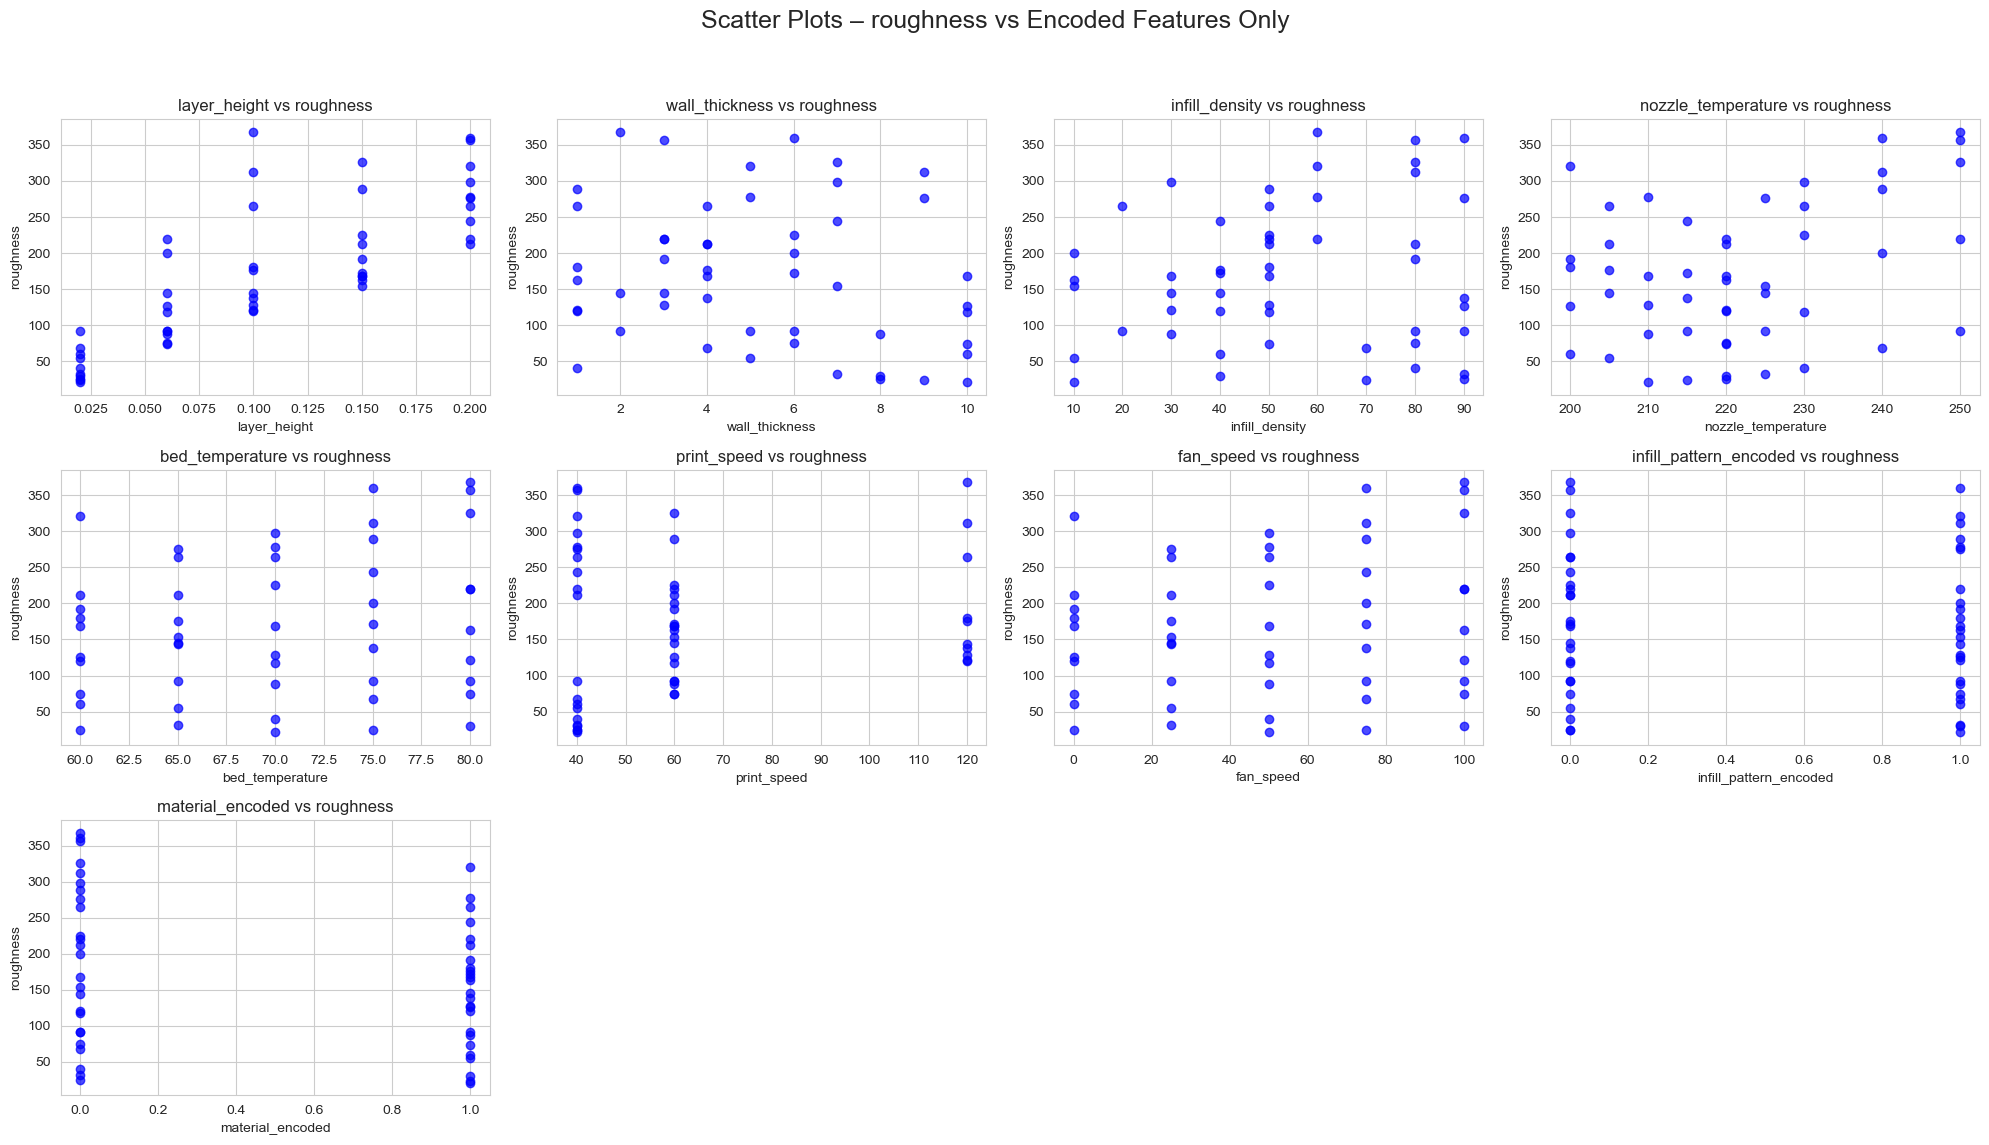

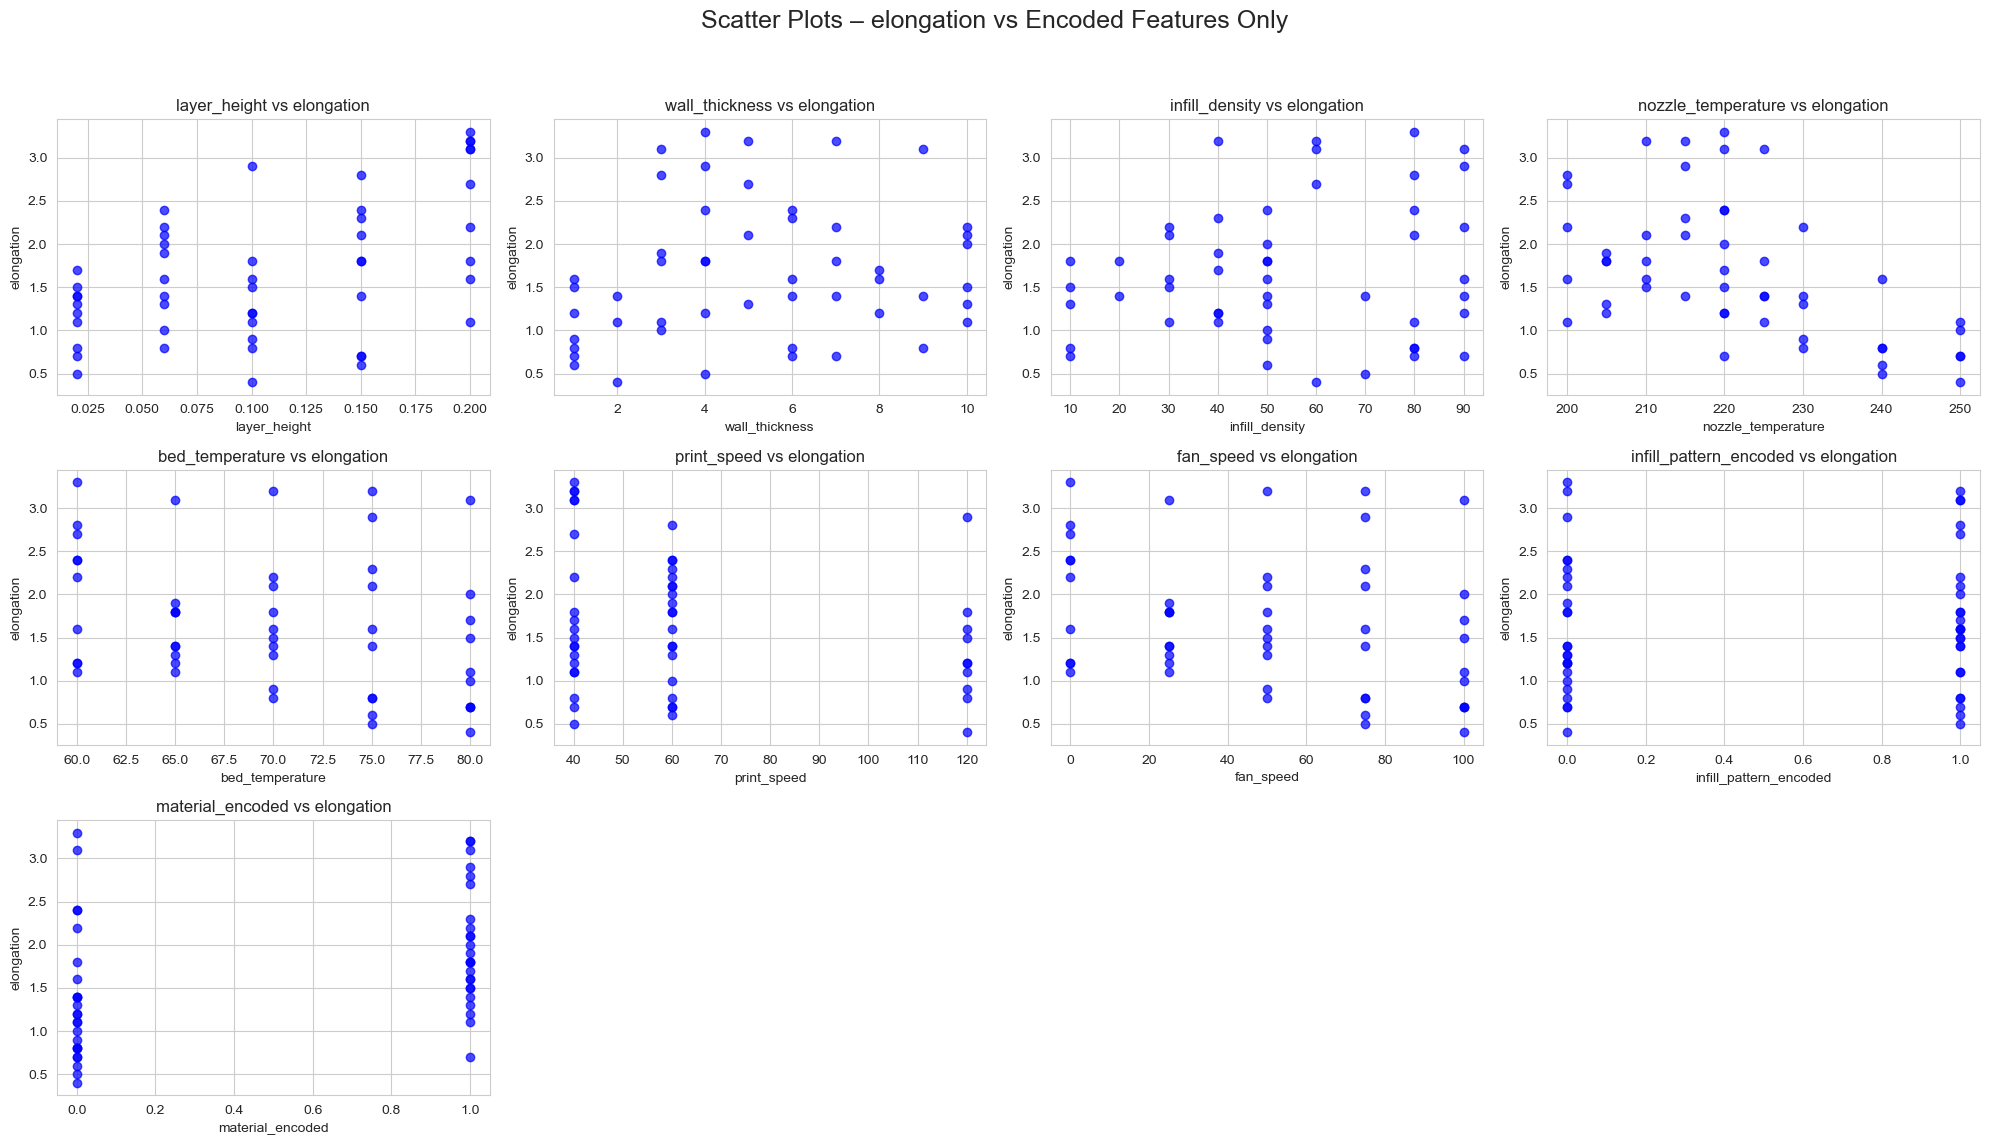

In [22]:
import matplotlib.pyplot as plt

targets = ['tensile_strength', 'roughness', 'elongation']#Defining targets

df_plot = df.drop(columns=[col for col in ['material', 'infill_pattern'] if col in df.columns])#Drop non-encoded string columns as  thyre not needed in scatter plots

features = [col for col in df_plot.columns if col not in targets]#Getting the features, so do not plot labels against one another 

for target in targets:#Iitialising th scatter plots 
    plt.figure(figsize=(20, 12))
    for i, feature in enumerate(features, 1):#looping all features for pots 
        plt.subplot(3, 4, i)
        plt.scatter(df_plot[feature], df_plot[target], color='blue', alpha=0.7)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.grid(True)
        plt.title(f'{feature} vs {target}')
    plt.suptitle(f'Scatter Plots – {target} vs Encoded Features Only', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])#plotting scatter plots next to one another for visualisation 
    plt.show()


Plotting the scatter plots of all the featuress and targets for visualisation. 
'Nozzle temperature' and 'Elongation' show a moderate negative correlation. 
'Layer height' and 'Roughness' show a strong positive correlation, suitable for Linear regression model. 

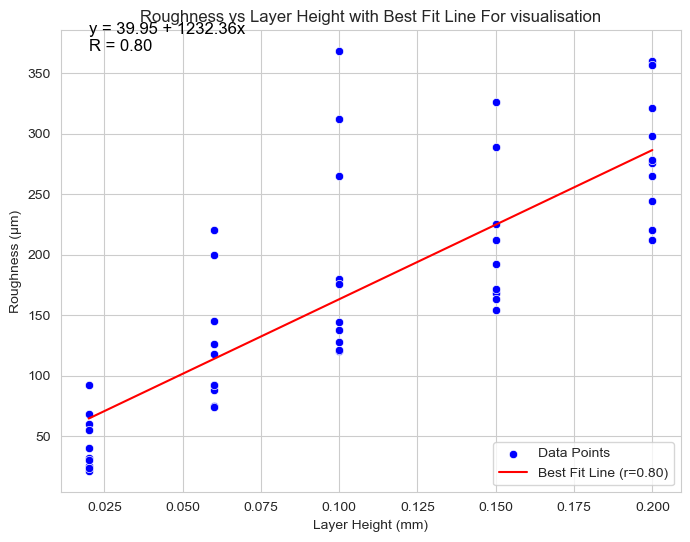

In [54]:
from scipy.stats import linregress
x = df["layer_height"]#defining the parameters we will be plotting 
y = df["roughness"]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept #defining the line 

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))#plotting the figure 
sns.scatterplot(x=x, y=y, color="blue", label="Data Points")

plt.plot(x, line, color="red", label=f"Best Fit Line (r={r_value:.2f})")#plotting regression line 
plt.text(min(x), max(y), f"y = {intercept:.2f} + {slope:.2f}x\nR = {r_value:.2f}", fontsize=12, color="black")#displaying the values on the plot for visuaisation 

plt.title("Roughness vs Layer Height with Best Fit Line For visualisation") #labelling
plt.xlabel("Layer Height (mm)")
plt.ylabel("Roughness (µm)")
plt.legend()
plt.show()

Strong Correlation was detected for the roughness and the layer height. The correlation is 0.8 and the equation of the line of the best fit can be seen on the figure. The line of the Best fit was plotted for visualisation of the optimal outcome of the Linear Regression Model. The correlation s shown as to be r^2 = 0.8, strong and positive, showing the best/optimal prediction of the linear Regression Model. 

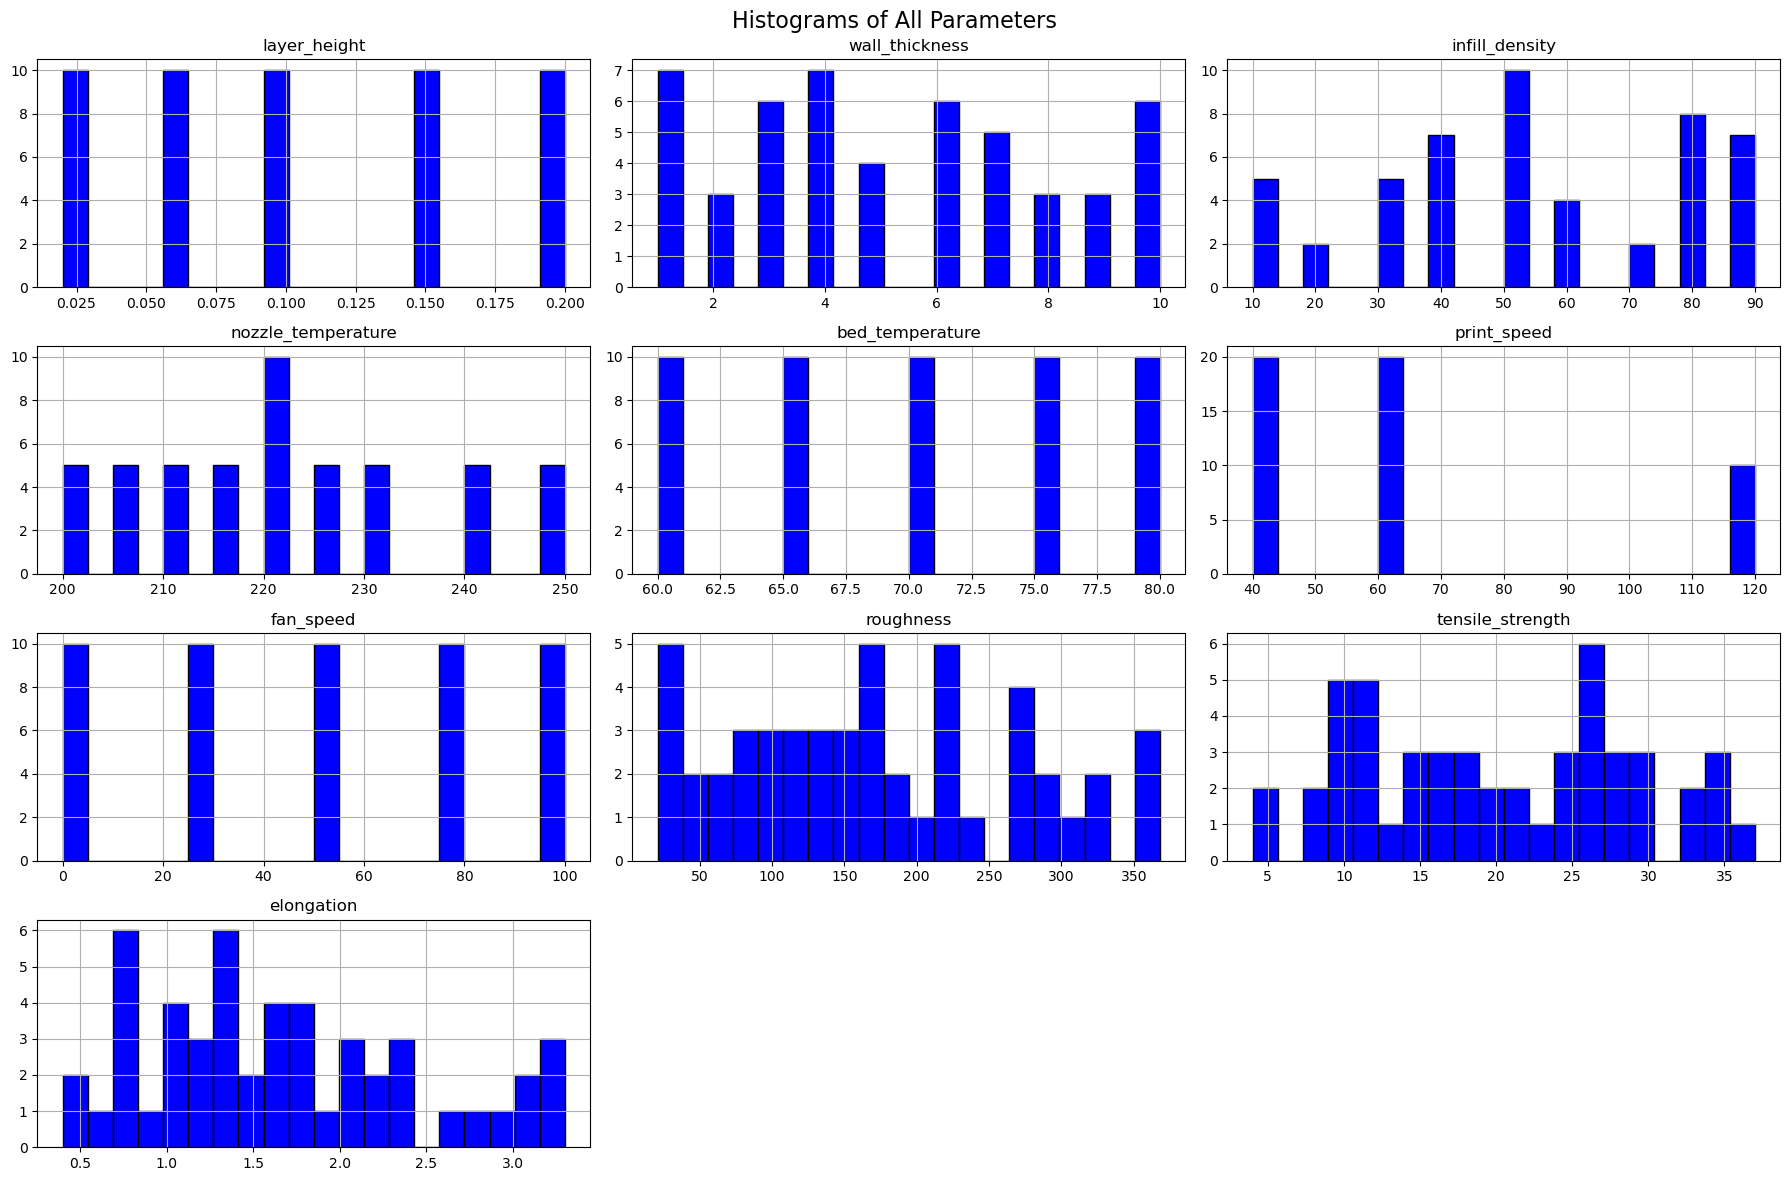

In [11]:
df_hist = df.drop(columns=[col for col in ['material', 'material_encoded', 'infill_pattern', 'infill_pattern_encoded'] if col in df.columns])
df_hist.hist(figsize=(18, 12), color='blue', edgecolor='black', bins=20)#Initialising the histogram plots for visualisation
plt.suptitle("Histograms of All Parameters", fontsize=16)
plt.tight_layout()#plotting box plots next to one another for visualisation
plt.show()


Plotting the scatter plots of all the featuress and targets. 
Some of the parameters such as 'Layer Height' , 'bed temperature', 'nozzle temperature', 'fan speed' and more show discrete properties, whereas parameters such as ' Roughness', ' Tensile Strength' and ' Elongation' are continuous. It can be stated that the labels of the dataset are all continuous data types. Discrete likely to be fixed settings by the 3d printer, whereas Continuous outputs show variation as they are the measured outputs, labels, and not set inputs by the printer. 

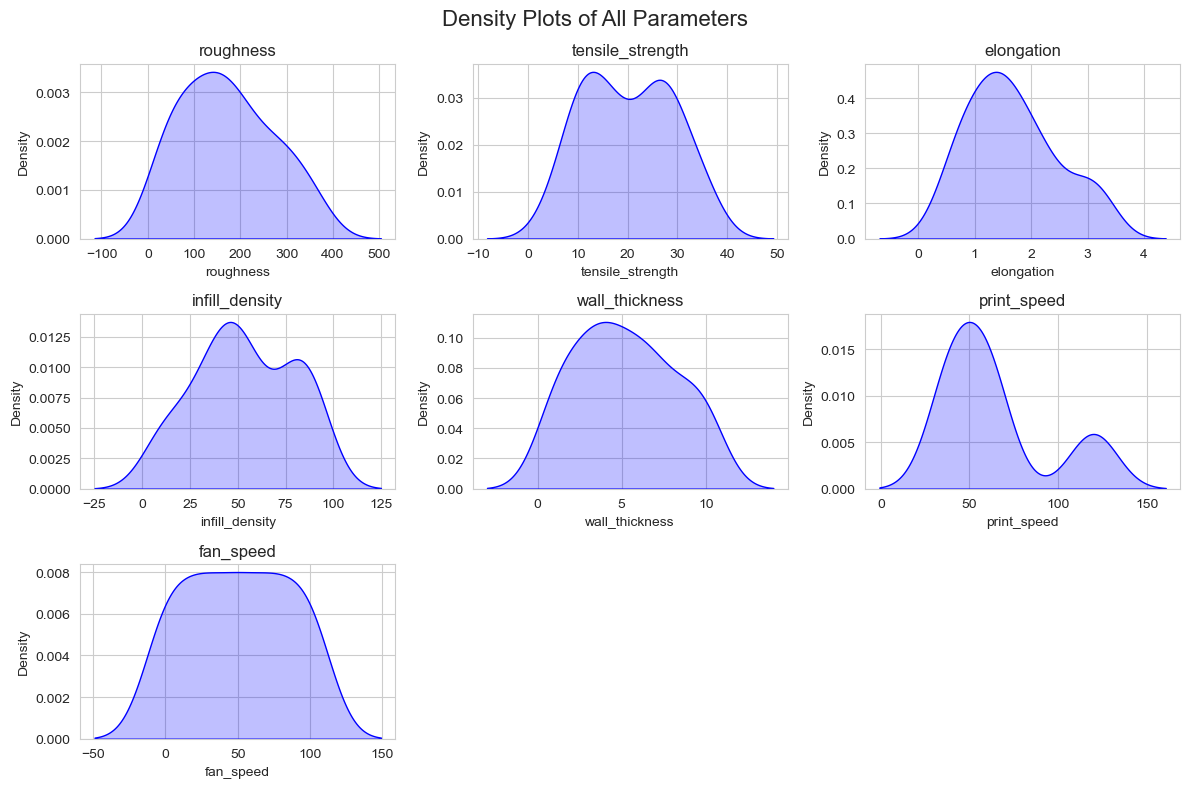

In [25]:
features = ['roughness', 'tensile_strength', 'elongation', 'infill_density', 
            'wall_thickness', 'print_speed', 'fan_speed']#features of the dataset 

plt.figure(figsize=(12, 8))#Initialising figures for the density plots 
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=feature, fill=True, color='blue') #Plotting the density plots
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.grid(True)
plt.suptitle("Density Plots of All Parameters", fontsize=16)
plt.tight_layout()#plotting density curves next to one another for visualisation
plt.show()


Density plots for all parameters:
* Roughness: 
The distribution is right-skewed with the peak on the left side of the center (at around 150). This means that the median is greater than the mean. There are no particularly sharp tails and this indicates a relatively smooth distribution. The values stretch into the negative side. There is a large range  of 150 (from -25 to 125).

* Tensile strength:
There are 2 peaks which shows a bimodal distribution. The first peak is at around 12 and the second peak is at around 27. There is a moderate range of 60 (from -10 to 50). The mean and median are approximately the same as the peaks are nearly the same causing the graph to be nearly symmetrical.

* Elongation:
The distribution is right-skewed with the peak on the left side of the center (at around 1.5). This means that the median is greater than the mean. The density decreases steadily from the peak to 2.5, where the decreasing slows down up to around 3.3, after this point the density decreases sharply again. This could be that beyond 3.3 there were fewer extreme values. There is a smaller range of 5 (from -1 to 4). 

* Infill density:
The distribution is right-skewed with the peak on the left side of the center (at around 42). This means that the median is greater than the mean. There is a tail (at around 85) which indicates that there are extreme values. There is a large range of 150, which also goes into the negative side (from -25 to 125). 

* Wall thickness:
The distribution is slightly right-skewed with the peak on the left side of the center (at around 4). This means that the median is greater than the mean. However, the distribution is approximately normal as the centre is at 5. There is a moderate range, which also goes into the negative side, of nearly 20 (from -5 to 15). There is a gradual decline on both sides of the peak that show that there are no extreme values/outliers. 

* Print speed:
There are 2 peaks which shows a bimodal distribution. The first peak is at around 50 and the second peak is at around 120. The 2 peaks may indicate different settings for the print speed (e.g. high speed & low speed). The mean will be greater than the median as the larger peak is on the left side. There is a large range of 150 (from 0 to 150).

* Fan speed:
The distribution is normal as the density plot is symmetrical. This means that the median and mean are equal. 

In [30]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()#Getting thr list of numeric columns

for col in numerical_columns:#using IQR for outliers check 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

layer_height: 0 outliers
wall_thickness: 0 outliers
infill_density: 0 outliers
nozzle_temperature: 0 outliers
bed_temperature: 0 outliers
print_speed: 10 outliers
fan_speed: 0 outliers
roughness: 0 outliers
tensile_strength: 0 outliers
elongation: 0 outliers
infill_pattern_encoded: 0 outliers
material_encoded: 0 outliers


Outliers analysis: in order to determine whether any features in the dataset contain outliers, the Interquartile Range (IQR) method is applied to all numerical columns. For each feature the IQR is calculated as Q3 - Q1, and any values below (Q1 - 1.5 × IQR) or above (Q3 + 1.5 × IQR) are classified as outliers. After applying this method to all numeric features, only 'print_speed' was found to contain outliers — 10 in total. It is also imortant to investigate the outler value, and that can be best seen from the scatter pots above. The outlier analysis highlighted 10 outliers of the print speed in a dataset of 50 values, it is almost a 20% of the entire dataset. The inspection of above plotted scatter plots for the print speed, against the targets, it is more clear that perhaps the flagged outliers are still valid points, as print speed takes a few discrete values such as 40,60 and 120. Given the information about the dataset it can be said that those 10 values flagge as outliers have meaningful information, hence should not be removed from the data for the analysis. The variation of the data is highly unlikely to be due to measurment or recording error. Hence the entries will be kept for the model generations, and not removed from the dataset. 
Luckily the print speed doesent have strong correlation with the targets, hence this is not that significant for regression models, as outliers are important for regression models.

All other features showed no sigs of the outliers 

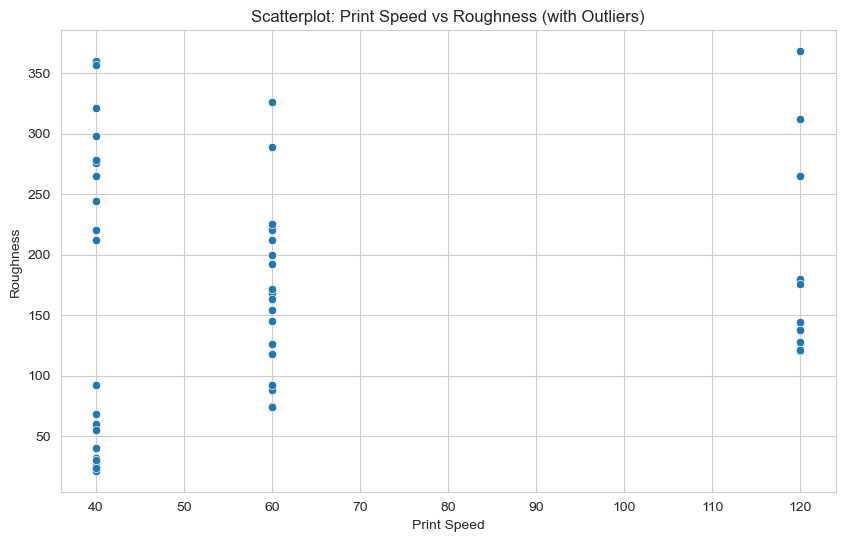

In [33]:
plt.figure(figsize=(10, 6))#Plotting data with outliers using scatterplot
sns.scatterplot(x=df["print_speed"], y=df["roughness"])
plt.title("Scatterplot: Print Speed vs Roughness (with Outliers)")
plt.xlabel("Print Speed")
plt.ylabel("Roughness")
plt.show()

We begin by visualising the relationship between 'print_speed' and 'roughness', where using the IQR method we analysed that 'print_speed' contains 10 outliers. This makes it a strong candidate for further visual and statistical inspection. This scatterplot helps to identify if those outliers might affect the target.

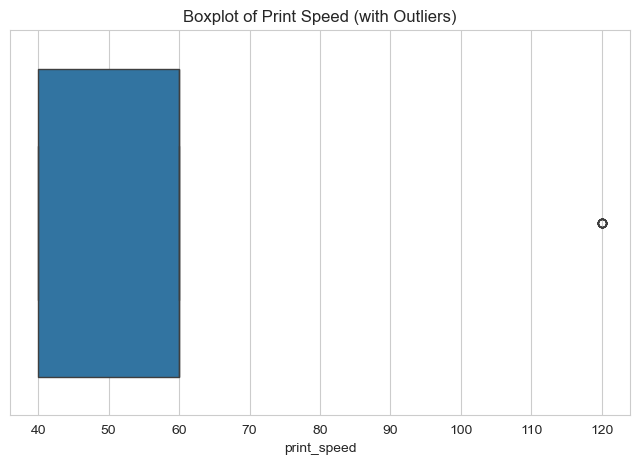

In [43]:
#Visualising using boxplot with outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['print_speed'])
plt.title('Boxplot of Print Speed (with Outliers)')
plt.show()

The boxplot is used to clearly show the presence of outliers in 'print_speed'.

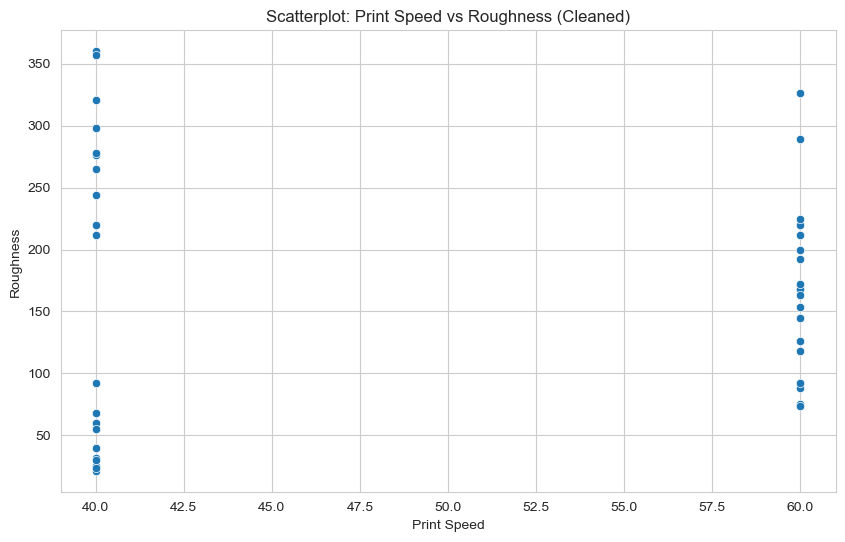

In [45]:
#IQR for print_speed
Q1_x = df["print_speed"].quantile(0.25)
Q3_x = df["print_speed"].quantile(0.75)
IQR_x = Q3_x - Q1_x
lower_x = Q1_x - 1.5 * IQR_x
upper_x = Q3_x + 1.5 * IQR_x

#IQR for roughness
Q1_y = df["roughness"].quantile(0.25)
Q3_y = df["roughness"].quantile(0.75)
IQR_y = Q3_y - Q1_y
lower_y = Q1_y - 1.5 * IQR_y
upper_y = Q3_y + 1.5 * IQR_y

#Filtering both to remove outliers 
df_cleaned = df[
    (df["print_speed"] >= lower_x) & (df["print_speed"] <= upper_x) &
    (df["roughness"] >= lower_y) & (df["roughness"] <= upper_y)]

# catterplot data after outlier removal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["print_speed"], y=df_cleaned["roughness"])
plt.title("Scatterplot: Print Speed vs Roughness (Cleaned)")
plt.xlabel("Print Speed")
plt.ylabel("Roughness")
plt.show()

For visualisation, outliers are detected and removed using IQR method. So data is filtered to retain only non-outlier data points. And a new scatterplot is then generated using this cleaned dataset to better visualise the core trend without distortion from outliers.

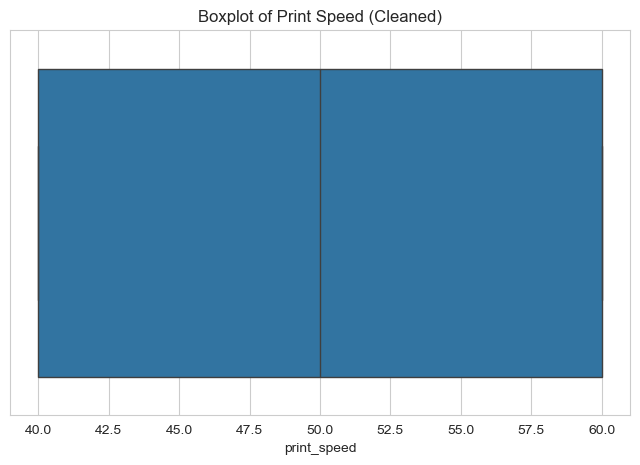

In [47]:
#Boxplot visualisation after outlier removal
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['print_speed'])
plt.title('Boxplot of Print Speed (Cleaned)')
plt.show()

With the cleaned dataset, boxplot visualisation is used again.

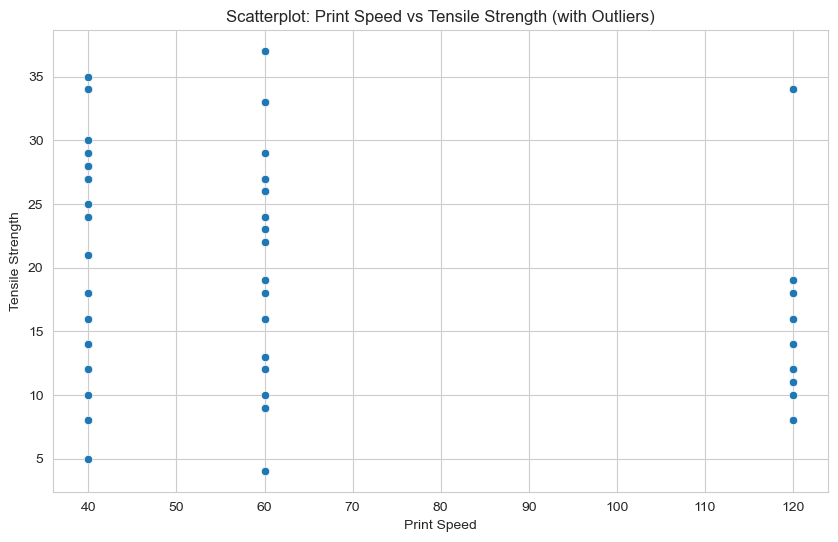

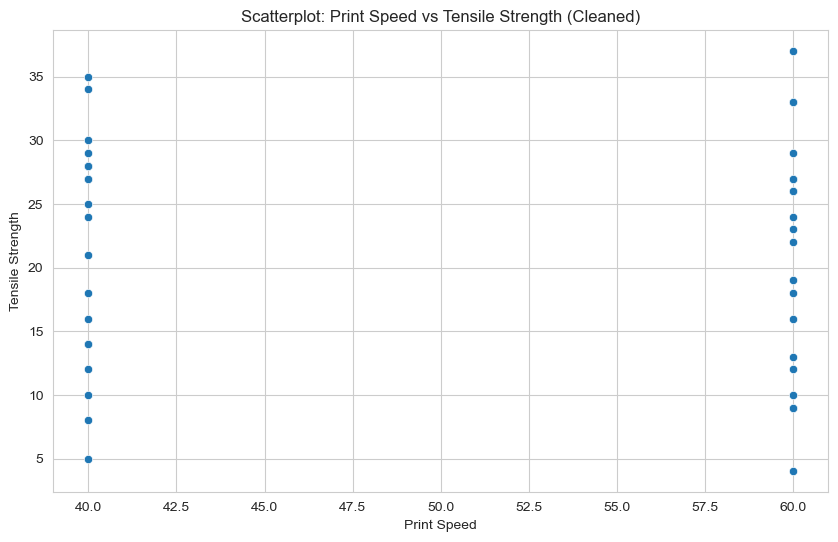

In [49]:
#Plotting data with outliers scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["print_speed"], y=df["tensile_strength"])
plt.title("Scatterplot: Print Speed vs Tensile Strength (with Outliers)")
plt.xlabel("Print Speed")
plt.ylabel("Tensile Strength")
plt.show()

#IQR for print_speed 
Q1_x = df["print_speed"].quantile(0.25)
Q3_x = df["print_speed"].quantile(0.75)
IQR_x = Q3_x - Q1_x
lower_x = Q1_x - 1.5 * IQR_x
upper_x = Q3_x + 1.5 * IQR_x

#IQR for tensile strength
Q1_y = df["tensile_strength"].quantile(0.25)
Q3_y = df["tensile_strength"].quantile(0.75)
IQR_y = Q3_y - Q1_y
lower_y = Q1_y - 1.5 * IQR_y
upper_y = Q3_y + 1.5 * IQR_y

#Filtering both to remove outliers 
df_cleaned = df[
    (df["print_speed"] >= lower_x) & (df["print_speed"] <= upper_x) &
    (df["tensile_strength"] >= lower_y) & (df["tensile_strength"] <= upper_y)]

#Scatterplot data after outlier removal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["print_speed"], y=df_cleaned["tensile_strength"])
plt.title("Scatterplot: Print Speed vs Tensile Strength (Cleaned)")
plt.xlabel("Print Speed")
plt.ylabel("Tensile Strength")
plt.show()

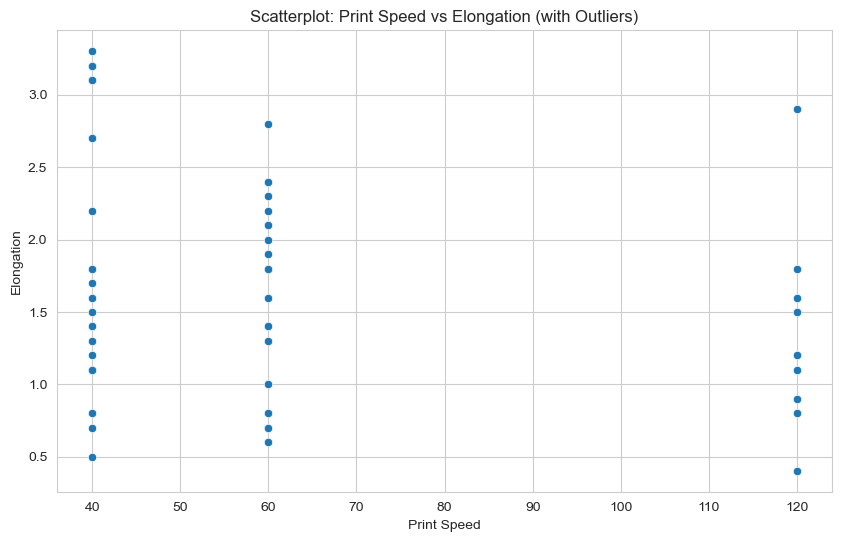

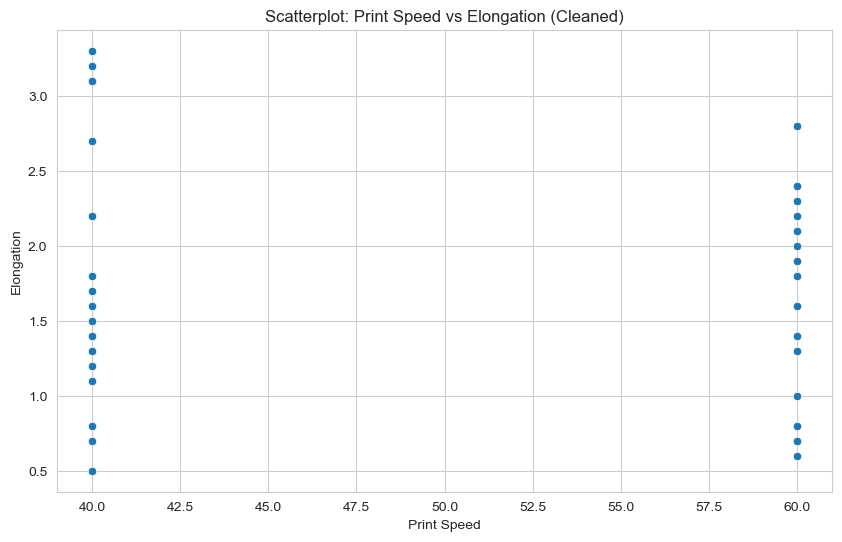

In [51]:
#Plotting data with outliers using scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["print_speed"], y=df["elongation"])
plt.title("Scatterplot: Print Speed vs Elongation (with Outliers)")
plt.xlabel("Print Speed")
plt.ylabel("Elongation")
plt.show()

#IQR for print_speed 
Q1_x = df["print_speed"].quantile(0.25)
Q3_x = df["print_speed"].quantile(0.75)
IQR_x = Q3_x - Q1_x
lower_x = Q1_x - 1.5 * IQR_x
upper_x = Q3_x + 1.5 * IQR_x

#IQR for tensile strength 
Q1_y = df["elongation"].quantile(0.25)
Q3_y = df["elongation"].quantile(0.75)
IQR_y = Q3_y - Q1_y
lower_y = Q1_y - 1.5 * IQR_y
upper_y = Q3_y + 1.5 * IQR_y

#Filtering both to remove outliers 
df_cleaned = df[
    (df["print_speed"] >= lower_x) & (df["print_speed"] <= upper_x) &
    (df["elongation"] >= lower_y) & (df["elongation"] <= upper_y)]

#Scatterplot data after outlier removal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["print_speed"], y=df_cleaned["elongation"])
plt.title("Scatterplot: Print Speed vs Elongation (Cleaned)")
plt.xlabel("Print Speed")
plt.ylabel("Elongation")
plt.show()

To generalise this analysis, the same outlier filtering is applied to 'tensile_strength' and 'elongation' with corresponding scatterplot visualisations. These additional plots retained their original patterns, suggesting that while 'print_speed' contains outliers, they have minimal impact on the overall data distribution. This observation confirms that outlier detection is important for ensuring clean input features, but their effect should always be assessed relative to the specific output being modeled.  

Although the outliers in 'print_speed' are close to the extreme threshold, their actual influence on the target variables is limited. This was confirmed through comparisons, where the patterns in scatterplots remained consistent before and after outlier removal. Therefore, while it is important to detect and address input outliers, their impact on the model should be considered on a case-by-case basis.